# TP3 - HMLA408: Joseph Salmon

## Question: importer la fonction chisquare

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
from scipy.stats import chisquare, norm, shapiro, poisson, chi2, chi2_contingency, ttest_1samp, t, f, ttest_ind,ttest_rel, levene, bartlett

In [3]:
from download import download
url = "http://josephsalmon.eu/enseignement/datasets/michelson.txt"
path_target = "datasets/michelson.txt"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'datasets/michelson.txt'

In [4]:
df_michelson = pd.read_csv("datasets/michelson.txt", sep='\s+') # \s+ : for hanlding spaces
df_michelson.head(n=10)  # df stands for Data Frame

,speed
0,850
1,740
2,900
3,1070
4,930
5,850
6,950
7,980
8,980
9,880


/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mesure de la vitesse de la lumière par Michelson')

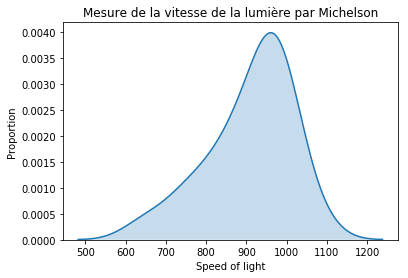

In [5]:
plt.figure()
ax = sns.kdeplot(df_michelson['speed'], shade=True)
plt.xlabel('Speed of light')
plt.ylabel('Proportion')
ax.legend().set_visible(False)
plt.title("Mesure de la vitesse de la lumière par Michelson")

In [6]:
sigma = 105

mu = df_michelson['speed'].mean()
n_samples = df_michelson['speed'].count()

In [7]:
mu0 = 990

In [8]:
df_michelson['speed'].std()

104.92603911427577

In [9]:
n_samples

20

In [10]:
np.abs((mu-mu0)/ (sigma / np.sqrt(n_samples)))

3.4499334509996755

In [11]:
 2- 2 * norm.cdf(np.abs((mu-mu0)/ (sigma / np.sqrt(n_samples))))

0.0005607247626622236

In [12]:
ttest_1samp(df_michelson['speed'], mu0)

Ttest_1sampResult(statistic=-3.4523652604521198, pvalue=0.0026685840985367784)

In [13]:
df_michelson['true-speed'] = df_michelson['speed'] + 299000
ttest_1samp(df_michelson['true-speed'], mu0 + 299000)
# good news ca ne change rien!

Ttest_1sampResult(statistic=-3.4523652604521198, pvalue=0.0026685840985367784)

# IC

In [14]:
alpha = 0.05
IC = np.array([mu - norm.ppf(1-alpha/2) * (sigma / np.sqrt(n_samples)),
               mu + norm.ppf(1-alpha/2) * (sigma / np.sqrt(n_samples))])

In [15]:
IC

array([862.98256662, 955.01743338])

In [16]:
alpha = 0.1
IC = np.array([mu - norm.ppf(1 - alpha / 2) * (sigma / np.sqrt(n_samples)),
               mu + norm.ppf(1 - alpha / 2) * (sigma / np.sqrt(n_samples))])

In [17]:
IC

array([870.38095251, 947.61904749])

In [18]:
alpha = 0.05
IC = np.array([mu - t.ppf(1 - alpha / 2, n_samples - 1) * (df_michelson['speed'].std() / np.sqrt(n_samples)),
               mu + t.ppf(1 - alpha / 2, n_samples - 1) * (df_michelson['speed'].std() / np.sqrt(n_samples))])
IC

array([859.89310209, 958.10689791])

In [19]:
alpha = 0.10
IC = np.array([mu - t.ppf(1 - alpha / 2, n_samples - 1) * (df_michelson['speed'].std() / np.sqrt(n_samples)),
               mu + t.ppf(1 - alpha / 2, n_samples - 1) * (df_michelson['speed'].std() / np.sqrt(n_samples))])
IC

array([868.43078233, 949.56921767])

# Brochets et concentration de polluants

In [20]:
from download import download
url = "http://josephsalmon.eu/enseignement/datasets/brochet2.dat"
path_target = "datasets/brochet2.dat"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'datasets/brochet2.dat'

In [21]:
df_brochets = pd.read_csv('datasets/brochet2.dat',sep = '\s+')  # XXX explain \s+

In [22]:
df_brochets['age'] = df_brochets['age'].replace("deux_ans", 2)
df_brochets['age'] = df_brochets['age'].replace("trois_ans", 3)

In [23]:
df_brochets.head()

,conc,age
0,0.144,2
1,0.171,2
2,0.178,2
3,0.184,2
4,0.193,2


In [24]:
df_brochets.query('age==2')['conc'].describe()

count    12.000000
mean      0.195250
std       0.027247
min       0.144000
25%       0.182500
50%       0.197500
75%       0.200750
max       0.258000
Name: conc, dtype: float64

In [25]:
df_brochets.query('age==2').describe()

,conc,age
count,12.000000,12.0
mean,0.195250,2.0
std,0.027247,0.0
min,0.144000,2.0
25%,0.182500,2.0
50%,0.197500,2.0
75%,0.200750,2.0
max,0.258000,2.0


In [26]:
df_brochets.query('age==3')['conc'].describe()

count    13.000000
mean      0.359923
std       0.039738
min       0.285000
25%       0.354000
50%       0.362000
75%       0.382000
max       0.413000
Name: conc, dtype: float64

In [27]:
df_brochets.query('age==3').describe()

,conc,age
count,13.000000,13.0
mean,0.359923,3.0
std,0.039738,0.0
min,0.285000,3.0
25%,0.354000,3.0
50%,0.362000,3.0
75%,0.382000,3.0
max,0.413000,3.0


/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Concentrations ')

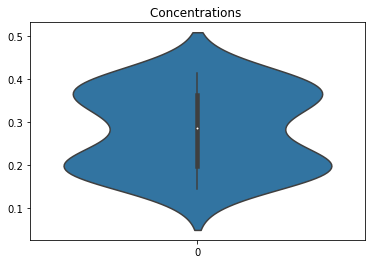

In [28]:
plt.figure()
sns.violinplot(data=df_brochets['conc'],orient='v')
plt.title("Concentrations ")

In [29]:
sns.violinplot?

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


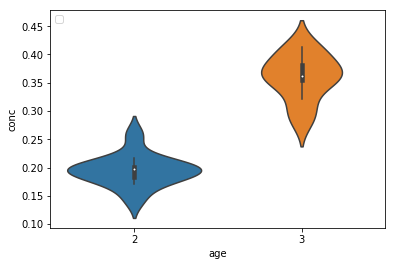

In [30]:
plt.figure()
sns.violinplot(x='age', y='conc', data=df_brochets, orient='v')
plt.legend(loc='upper left')

In [31]:
X2 = df_brochets.query('age==2')['conc']
X3 = df_brochets.query('age==3')['conc']

In [32]:
ttest_ind?

In [33]:
ttest_ind(a=X2,b=X3, equal_var = False) # rejet donc pval tellement petite...

Ttest_indResult(statistic=-12.161924260743977, pvalue=4.696819789876163e-11)

In [34]:
levene(X2, X3)  # rejet donc pval tellement petite...

LeveneResult(statistic=1.2685084379364857, pvalue=0.2716614974618714)

In [35]:
bartlett(X2, X3)  # rejet donc pval tellement petite...

BartlettResult(statistic=1.5144265025677355, pvalue=0.21846488186226679)

In [36]:
fdistribution = f(len(X2) - 1, len(X3) - 1)  # build an F-distribution object
fstatistics = np.var(X2, ddof=1) / np.var(X3, ddof=1)
p_value = 2 * min(fdistribution.cdf(fstatistics),
                  1 - fdistribution.cdf(fstatistics))
p_value

0.22175826607655053

In [37]:
import rpy2.robjects as robjects
def Ftest_pvalue_rpy2(d1,d2):
    """docstring for Ftest_pvalue_rpy2"""
    rd1 = (robjects.FloatVector(d1))
    rd2 = (robjects.FloatVector(d2))
    rvtest = robjects.r['var.test']
    return rvtest(rd1,rd2)[2][0]

In [38]:
Ftest_pvalue_rpy2(X2,X3)

0.22175826607655033

In [39]:
# XXX todo : unilatéral...

In [40]:
ttest_ind(a=X2, b=X3, equal_var = True) # rejet donc pvalue tellement petite...

Ttest_indResult(statistic=-11.980435981106135, pvalue=2.2833306618065592e-11)

# Pollution en Occitanie
Mesures de pollution prise entre le 2017-10-18 et le 2018-10-07 sur différentes villes d'Occitanie.
Plus d'information disponible sur le site:
http://data-atmo-occitanie.opendata.arcgis.com/datasets/047b4d01a64943cb8a648aaf9b58307b_0
d'où ces données sont extraites.

In [41]:
url = "http://josephsalmon.eu/enseignement/datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv"
path_target = "datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv'

In [42]:
df_pol_occ = pd.read_csv(path_target).sort_values('nom_com', axis=0, ascending=True)
df_pol_occ.head(5)

,X,Y,id,nom_dep,nom_com,code_insee,nom_station,code_station,typologie,influence,...,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,x_wgs84,y_wgs84,geom,FID
14528,3.50483,43.2878,16721,HERAULT,AGDE,34003,Agathois-Piscénois - Périurbain,FR08022,suburban,Fond,...,journaliere,2018-10-02T01:00:00.000Z,2018-10-03T00:00:00.000Z,t,740996,6243310,3.50483,43.2878,0101000020E6100000000000E0E4090C4000000040D5A4...,16721
15129,3.50483,43.2878,14322,HERAULT,AGDE,34003,Agathois-Piscénois - Périurbain,FR08022,suburban,Fond,...,journaliere,2018-09-07T01:00:00.000Z,2018-09-08T00:00:00.000Z,t,740996,6243310,3.50483,43.2878,0101000020E6100000000000E0E4090C4000000040D5A4...,14322
6006,3.50483,43.2878,15007,HERAULT,AGDE,34003,Agathois-Piscénois - Périurbain,FR08022,suburban,Fond,...,journaliere,2018-09-14T01:00:00.000Z,2018-09-15T00:00:00.000Z,t,740996,6243310,3.50483,43.2878,0101000020E6100000000000E0E4090C4000000040D5A4...,15007
5999,3.50483,43.2878,3000,HERAULT,AGDE,34003,Agathois-Piscénois - Périurbain,FR08022,suburban,Fond,...,journaliere,2018-05-27T01:00:00.000Z,2018-05-28T00:00:00.000Z,t,740996,6243310,3.50483,43.2878,0101000020E6100000000000E0E4090C4000000040D5A4...,3000
15094,3.50483,43.2878,14287,HERAULT,AGDE,34003,Agathois-Piscénois - Périurbain,FR08022,suburban,Fond,...,journaliere,2018-09-06T01:00:00.000Z,2018-09-07T00:00:00.000Z,t,740996,6243310,3.50483,43.2878,0101000020E6100000000000E0E4090C4000000040D5A4...,14287


In [43]:
df_pol_occ.tail(5)

,X,Y,id,nom_dep,nom_com,code_insee,nom_station,code_station,typologie,influence,...,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,x_wgs84,y_wgs84,geom,FID
11766,1.39326,43.5616,8767,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-SETMI Eisenhower \n,FR12039,urban,Industrielle,...,journaliere,2017-12-02T01:00:00.000Z,2017-12-03T00:00:00.000Z,t,570147,6274930,1.39326,43.5616,0101000020E610000000000000CB4AF63F000000E0E1C7...,8767
11765,1.39326,43.5616,8766,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-SETMI Eisenhower \n,FR12039,urban,Industrielle,...,journaliere,2017-12-01T01:00:00.000Z,2017-12-02T00:00:00.000Z,t,570147,6274930,1.39326,43.5616,0101000020E610000000000000CB4AF63F000000E0E1C7...,8766
11764,1.39326,43.5616,8765,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-SETMI Eisenhower \n,FR12039,urban,Industrielle,...,journaliere,2017-11-30T01:00:00.000Z,2017-12-01T00:00:00.000Z,t,570147,6274930,1.39326,43.5616,0101000020E610000000000000CB4AF63F000000E0E1C7...,8765
11778,1.39326,43.5616,8779,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-SETMI Eisenhower \n,FR12039,urban,Industrielle,...,journaliere,2017-12-14T01:00:00.000Z,2017-12-15T00:00:00.000Z,t,570147,6274930,1.39326,43.5616,0101000020E610000000000000CB4AF63F000000E0E1C7...,8779
20807,1.43861,43.6236,18000,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Mazades Urbain\n,FR12021,urban,Fond,...,journaliere,2017-11-05T01:00:00.000Z,2017-11-06T00:00:00.000Z,t,573948,6281750,1.43861,43.6236,0101000020E6100000000000008D04F73F000000A0D2CF...,18000


In [44]:
df_pol_occ['polluant'].unique()  # polluants

array(['O3', 'NO2', 'NO', 'NOX as NO2', 'PM10', 'C6H6', 'PM2.5', 'SO2',
       'H2S'], dtype=object)

In [45]:
df_pol_occ['nom_com'].unique()  # villes

array(['AGDE', 'ALBI', 'BELESTA-EN-LAURAGAIS', 'BESSIERES', 'BLAGNAC',
       'CAHORS', 'CASTRES', 'CORNEILHAN', 'FRAISSE-SUR-AGOUT',
       'GAUDONVILLE', 'LA CALMETTE', 'LATTES', 'LOURDES', 'LUNEL-VIEL',
       'MILLAU', 'MIRAMONT-DE-COMMINGES', 'MONTGISCARD', 'MONTPELLIER',
       'NIMES', 'PAMIERS', 'PERPIGNAN', 'PEYRUSSE-VIEILLE', 'RODEZ',
       'SAINT-ESTEVE', 'SAINT-GAUDENS', 'SAINT-GELY-DU-FESC',
       'SAINT-LAURENT-DES-ARBRES', 'SAINT-PRIVAT-DES-VIEUX', 'SAZE',
       'TARBES', 'TOULOUSE'], dtype=object)

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Pollution en Occitanie (2017-10-18 / 2018-10-07)')

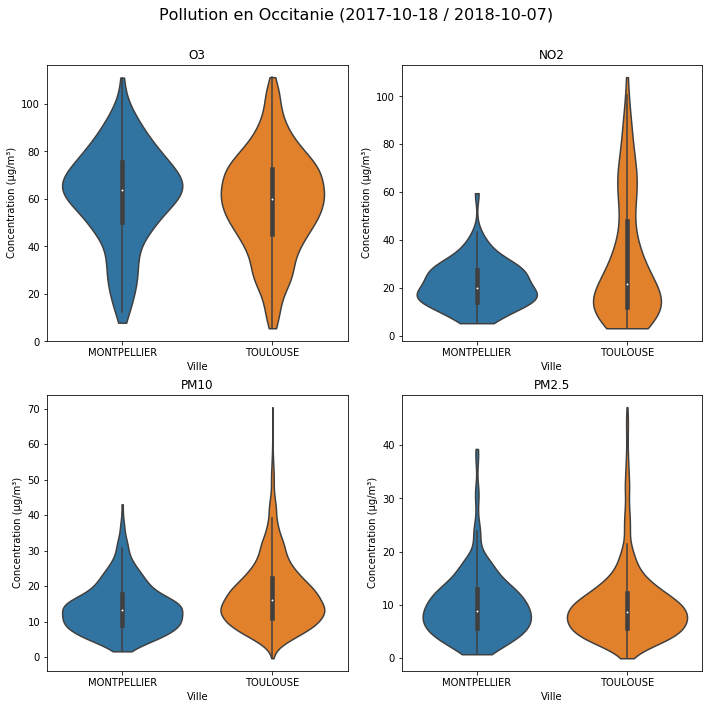

In [46]:
polluants = ['O3', 'NO2', 'NO', 'PM10', 'PM2.5']
polluants = ['O3', 'NO2', 'PM10', 'PM2.5']

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
df_pol_occ = df_pol_occ.rename(columns={'nom_com': 'Ville'})
for i, polluant in enumerate(polluants):
    querry = "(Ville=='TOULOUSE' or Ville=='MONTPELLIER') and " + \
        "polluant=='{}'".format(polluant)
    df_polluant = df_pol_occ.query(querry)[['Ville', 'valeur_originale']]
    plt.title(polluant)
    ax = axes.reshape(-1)[i]
    sns.violinplot(x='Ville', y='valeur_originale',
                   data=df_polluant, orient='v', cut=0, ax=ax)
    ax.set_title(polluant)
    ax.set_ylabel('Concentration (μg/m³)')
# fig.delaxes(axes.reshape(-1)[5])  # for case with 5 axes
plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Pollution en Occitanie (2017-10-18 / 2018-10-07)", fontsize=16)
# fig.savefig("../srcimages/pollution_occitanie.svg") # seulement pour sauvegarder l'image

In [47]:
polluants = ['O3', 'PM10', 'NO', 'NO2', 'PM2.5']

for polluant in polluants:
    querry = "(Ville=='TOULOUSE' or Ville=='MONTPELLIER') and " + \
        "polluant=='{}'".format(polluant)
    df_polluant = df_pol_occ.query(querry)[['Ville', 'valeur_originale']]
    X_Mtpl = df_polluant.query("Ville=='MONTPELLIER'")['valeur_originale']
    X_Tlse = df_polluant.query("Ville=='TOULOUSE'")['valeur_originale']
    stat, p_val = ttest_ind(a=X_Mtpl, b=X_Tlse, equal_var=False)
    print("Polluant: {0} \n stat={1}; pvalue={2}".format(polluant,stat, p_val))

Polluant: O3 
 stat=2.270731373965671; pvalue=0.023498373342240576
Polluant: PM10 
 stat=-8.62536518471858; pvalue=7.724198632236554e-17
Polluant: NO 
 stat=-9.459132928106122; pvalue=3.489004021257441e-18
Polluant: NO2 
 stat=-4.971194847877989; pvalue=1.1139891965197875e-06
Polluant: PM2.5 
 stat=-0.277336105021228; pvalue=0.7816278587827038


# Comparaison d'échantillons appariés

## Cas des filtres à eau

In [48]:
ttest_rel?

In [49]:
url = "http://josephsalmon.eu/enseignement/datasets/filtre.dat"
path_target = "datasets/filtre.dat"
download(url, path_target, replace=False)
df_filtre = pd.read_csv(path_target, sep = '\s+')

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


In [50]:
df_filtre.head()

,verre,papier
0,65,53
1,80,63
2,89,62
3,64,52
4,68,64


In [51]:
df_filtre['delta'] = df_filtre['verre'] - df_filtre['papier']

In [52]:
df_filtre.head()

,verre,papier,delta
0,65,53,12
1,80,63,17
2,89,62,27
3,64,52,12
4,68,64,4


/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Différences entre prélévements entre "verre" et "papier" (mg)')

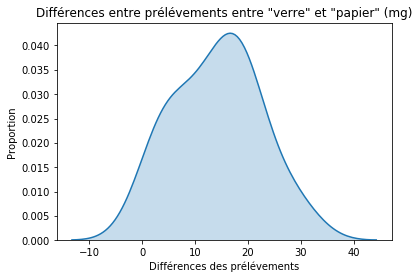

In [53]:
plt.figure()
ax = sns.kdeplot(df_filtre['delta'], shade=True)
plt.xlabel('Différences des prélévements')
plt.ylabel('Proportion')
ax.legend().set_visible(False)
plt.title('Différences entre prélévements entre "verre" et "papier" (mg)')

In [54]:
shapiro(df_filtre['delta'])

(0.9708637595176697, 0.6247771382331848)

In [55]:
# reject pvalue so small...
ttest_rel(df_filtre['verre'], df_filtre['papier'])

Ttest_relResult(statistic=9.120128506885786, pvalue=1.3917937799701256e-09)

## Cas de la mesure des arbres: avant / après abattage

In [56]:
url = "http://josephsalmon.eu/enseignement/datasets/tailles_arbres.csv"
path_target = "datasets/tailles_arbres.csv"
download(url, path_target, replace=False)
df_arbres = pd.read_csv(path_target, header=0)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


In [57]:
df_arbres.columns

Index(['sur_pied', 'abattus'], dtype='object')

In [58]:
df_arbres['delta'] = df_arbres['sur_pied'] - df_arbres['abattus']

/home/jo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Différences entre mesures avant / après abattage (m)')

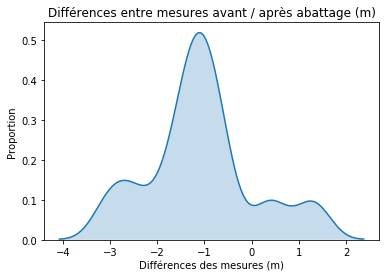

In [59]:
plt.figure()
ax = sns.kdeplot(df_arbres['delta'], shade=True)
plt.xlabel('Différences des mesures (m)')
plt.ylabel('Proportion')
ax.legend().set_visible(False)
plt.title('Différences entre mesures avant / après abattage (m)')

In [60]:
ttest_rel(df_filtre['verre'], df_filtre['papier'])   # Reject < 0.05

Ttest_relResult(statistic=9.120128506885786, pvalue=1.3917937799701256e-09)